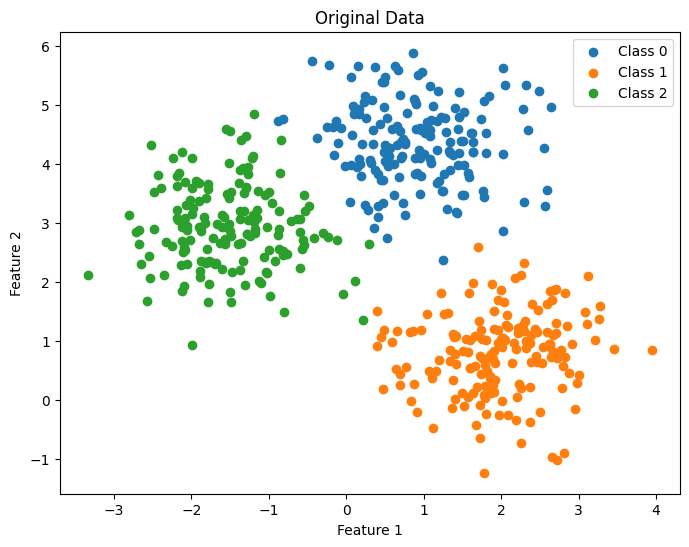

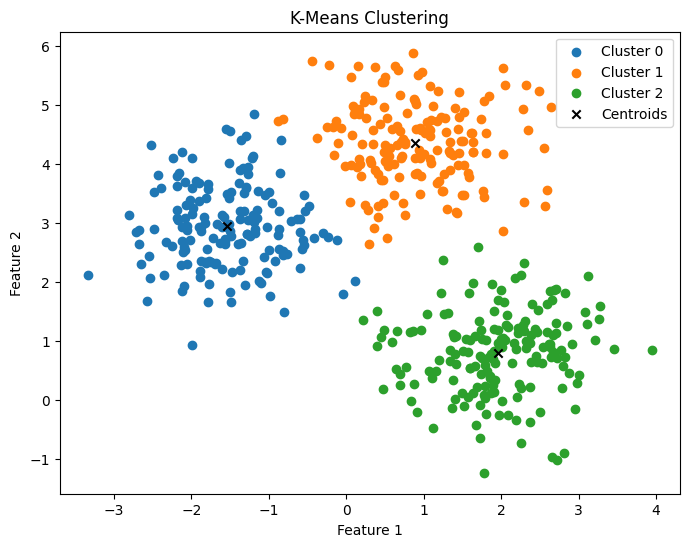

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data and labels
# data = np.load('data.npy')
# labels = np.load('labels.npy')

# Plot original data with different colors for different labels
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    plt.scatter(data[labels == label, 0], data[labels == label, 1], label=f'Class {label}')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids randomly
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)

            # Update centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check for convergence
            if np.all(centroids == new_centroids):
                break

            centroids = new_centroids

        self.labels_ = labels
        self.cluster_centers_ = centroids

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Plot final clustering assignments
plt.figure(figsize=(8, 6))
for label in np.unique(kmeans.labels_):
    plt.scatter(data[kmeans.labels_ == label, 0], data[kmeans.labels_ == label, 1], label=f'Cluster {label}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


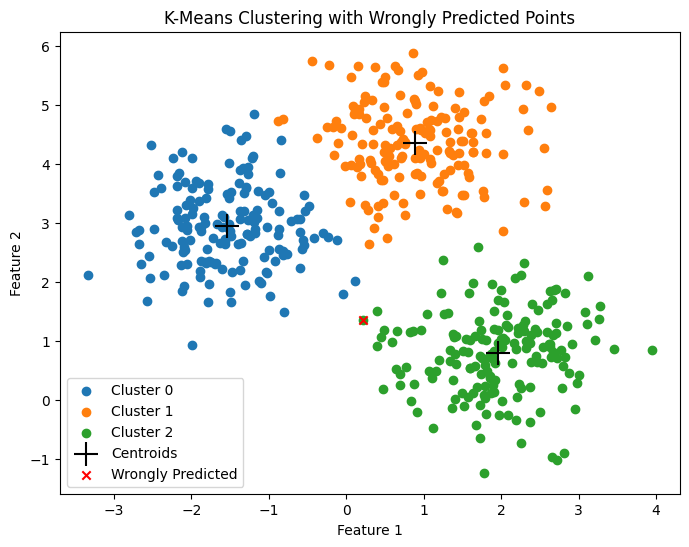

In [ ]:
# Find wrongly predicted points
wrongly_predicted_indices = np.where(kmeans.labels_ == labels)[0]
wrongly_predicted_points = data[wrongly_predicted_indices]

# Plot final clustering assignments along with wrongly predicted points
plt.figure(figsize=(8, 6))
for label in np.unique(kmeans.labels_):
    plt.scatter(data[kmeans.labels_ == label, 0], data[kmeans.labels_ == label, 1], label=f'Cluster {label}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', color='black', label='Centroids', s=300)
plt.scatter(wrongly_predicted_points[:, 0], wrongly_predicted_points[:, 1], marker='x', color='red', label='Wrongly Predicted')
plt.title('K-Means Clustering with Wrongly Predicted Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
